# Najlepsze wyniki uzyskałem dla modelu 8-8-1 z funkcja aktywacji relu 

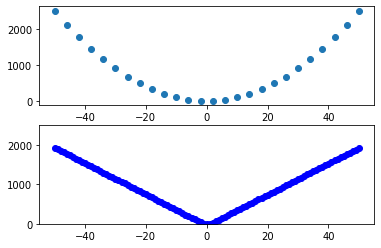

epochs=0   loss=1300330.0105198019
epochs=100   loss=949920.6819306931
epochs=200   loss=193158.79362623763
epochs=300   loss=93604.98468440594
epochs=400   loss=90178.93417388614
epochs=500   loss=87146.62043626238
epochs=600   loss=83911.16777537129
epochs=700   loss=80833.00738706683
epochs=800   loss=77899.98124226485
epochs=900   loss=74970.16232209158
epochs=1000   loss=71995.56621287129


In [3]:
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers, backend, regularizers
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf


# draw1
fig, axes = plt.subplots(2)
x = np.linspace(-50,50,26)
y = x ** 2
axes[0].scatter(x, y)

# parabole
x = np.c_[np.linspace(-50,50,101)]
y = x ** 2
o = np.ones((101,2))
o[:,:1] = x
x = o

# 8-8-1 + relu + Adam
model = Sequential()
model.add(Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_dim=2))
model.add(Dense(units=8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(units=1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
adam = optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=adam)

history = model.fit(x,y, epochs=1000, verbose=False)
p = model.predict(x)

#draw2
axes[1].set_ylim([0, 2500])
axes[1].scatter(np.delete(x, 1, 1), p, color="blue")
plt.show()

losses = [v for i, v in enumerate(history.history['loss']) if i % 99 == 0 ]
for i, v in enumerate(losses):
    print(f'epochs={i*100}   loss={v}')